Download Datset from google drive

In [36]:
!gdown --id 15VXPUzDuYgNyc1NJ6aC7Rnc7tlTfDDEC

Downloading...
From: https://drive.google.com/uc?id=15VXPUzDuYgNyc1NJ6aC7Rnc7tlTfDDEC
To: /content/vaksinasi_jakarta_mau_ke_csv_1.csv
100% 5.17k/5.17k [00:00<00:00, 7.93MB/s]


import all library needed

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

load dataset csv use "total vaksinasi 1"

In [38]:
dataset_JKT = read_csv('/content/vaksinasi_jakarta_mau_ke_csv_1.csv', usecols=[11]).values.astype('int')

In [39]:
dataset_JKT

array([[ 281997],
       [ 289951],
       [ 334506],
       [ 361710],
       [ 423139],
       [ 473494],
       [ 483492],
       [ 519575],
       [ 537965],
       [ 550088],
       [ 599696],
       [ 647957],
       [ 692365],
       [ 734359],
       [ 810602],
       [ 824569],
       [ 846439],
       [ 879229],
       [ 925387],
       [ 997730],
       [1046483],
       [1092686],
       [1121735],
       [1140388],
       [1178243],
       [1220617],
       [1267378],
       [1301379],
       [1325622],
       [1339471],
       [1352341],
       [1387188],
       [1415143],
       [1436663],
       [1475689],
       [1506706],
       [1528219],
       [1537387],
       [1569019],
       [1584064],
       [1598341],
       [1615457],
       [1633447],
       [1641932],
       [1646295],
       [1668563],
       [1687399],
       [1708066],
       [1746457],
       [1770866],
       [1770866]])

In [40]:
dataset_JKT.shape

(51, 1)

function to get difference data from next day to day before it, to see changes every one day

In [41]:
def delta_time_series(data):
    return data[1:]- data[:-1]

In [42]:
dataset_delta_JKT = delta_time_series(dataset_JKT)

In [43]:
dataset_delta_JKT

array([[ 7954],
       [44555],
       [27204],
       [61429],
       [50355],
       [ 9998],
       [36083],
       [18390],
       [12123],
       [49608],
       [48261],
       [44408],
       [41994],
       [76243],
       [13967],
       [21870],
       [32790],
       [46158],
       [72343],
       [48753],
       [46203],
       [29049],
       [18653],
       [37855],
       [42374],
       [46761],
       [34001],
       [24243],
       [13849],
       [12870],
       [34847],
       [27955],
       [21520],
       [39026],
       [31017],
       [21513],
       [ 9168],
       [31632],
       [15045],
       [14277],
       [17116],
       [17990],
       [ 8485],
       [ 4363],
       [22268],
       [18836],
       [20667],
       [38391],
       [24409],
       [    0]])

In [44]:
dataset_delta_JKT.shape

(50, 1)

In [45]:
def plot_delta(data):
    plt.plot(delta_time_series(data))
    plt.ylabel('Vaksinasi Total 1')
    plt.show()

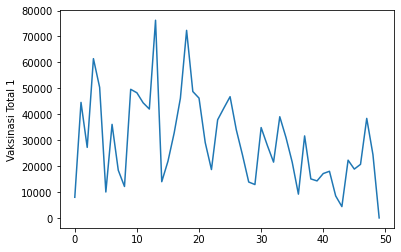

In [46]:
plot_delta(dataset_JKT)

function to get y values from TimeSeriesGenerator

In [47]:
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [48]:
def binary_accuracy(a, b):
    '''
    Helper function to compute the match score of two 
    binary numpy arrays.
    '''
    assert len(a) == len(b)
    return (a == b).sum() / len(a)  

normalize datset and split dataset to train and test

In [49]:
dataset = dataset_delta_JKT
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look back every 3 days data, Look back is the number of previous days data to use, to predict the value for the next day.

In [50]:
look_back = 3

In [51]:
train_data_gen = TimeseriesGenerator(train, train,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=3)

In [52]:
test_data_gen = TimeseriesGenerator(test, test,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=1)

define model machine learning and training start

In [53]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')

In [54]:
history = model.fit_generator(train_data_gen, epochs=100).history

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.3743
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2097
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0820
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0728
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0606
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0515
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0377
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0619
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0432
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0552
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0714
Epoch 12/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 13/100
10/10 [=================

Evaluates the model on a data generator.

In [55]:
model.evaluate_generator(test_data_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.07974260300397873

Generates predictions for the input samples from a data generator.

In [56]:
trainPredict = model.predict_generator(train_data_gen)
trainPredict.shape

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(30, 1)

In [57]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(14, 1)

invert predictions, scale values back to real index range.

In [58]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [59]:
trainY = get_y_from_generator(train_data_gen)
testY = get_y_from_generator(test_data_gen)

(30, 1)
(14, 1)


In [60]:
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

calculate root mean squared error

In [61]:
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 17058.63 RMSE
Test Score: 21530.06 RMSE


invert dataset, scale values back to real index range.

In [62]:
dataset = scaler.inverse_transform(dataset)
dataset.shape

(50, 1)

dataset added by changes everyday to see the difference everyday

In [63]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Delta + previous close
trainPredictPlot = trainPredictPlot + dataset_JKT[1:]

In [64]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict

# Delta + previous close
testPredictPlot = testPredictPlot + dataset_JKT[1:]

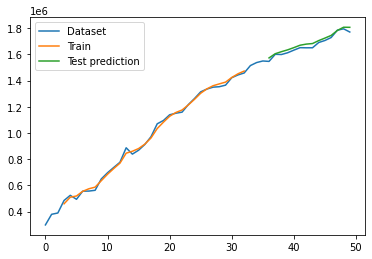

In [65]:
# plot baseline and predictions
datsetLegend = plt.plot(dataset + dataset_JKT[1:], label='Dataset')
trainLegend = plt.plot(trainPredictPlot, label = 'Train')
testLegend = plt.plot(testPredictPlot, label = 'Test prediction')
plt.legend()
plt.show()

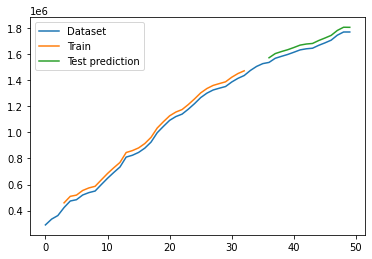

In [66]:
# plot baseline and predictions
datasetLegend = plt.plot(dataset + dataset_JKT[:-1], label='Dataset')
trainLegend = plt.plot(trainPredictPlot,label='Train')
testLegend = plt.plot(testPredictPlot,label='Test prediction')
plt.legend();
plt.show()

In [67]:
model.save("my_h5_model.h5")